# Milestone 2 - Exploratory Analysis

This notebook regroups the different plots of the exploratory analysis of our dataset. 
To see all plots and maps, we invite you to follow [this NBviewer link](https://nbviewer.jupyter.org/github/julied20/ada-2017/blob/master/Project/exploratory_analysis.ipynb?flush_cache=true)

In [1]:
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
import branca.colormap as cm

from helpers.conflict_extraction import *
from helpers.data_extraction import *

In [2]:
# Datasets creation/loading
create_df_from_scratch = False

if create_df_from_scratch:
    print("Creation of the European ex colonies dataframe...\n")
    colonization_df = get_wikipedia_dataframe()
    print("\nCreation of the different conflicts dataframe...\n")
    clean_conflict, pre_colonization_conflict_df, post_colonization_conflict_df, yr_conflict_df = get_colonization_conflicts_df()
else:
    colonization_df = pd.read_csv('datasets/colonies_wikipedia.csv')
    clean_conflict  = pd.read_csv('datasets/colonization_conflict_general.csv')
    pre_colonization_conflict_df  = pd.read_csv('datasets/colonization_conflict_pre.csv')
    post_colonization_conflict_df = pd.read_csv('datasets/colonization_conflict_post.csv')
    yr_conflict_df = pd.read_csv('datasets/colonization_conflict_year_regions.csv')

Creation of the European ex colonies dataframe...

Denmark ...
France ...
Netherlands ...
Norway ...
Portugal ...
Russia ...
Spain ...
Sweden ...
Brandenburg ...
Britain ...
Courland ...
Denmark-Norway ...
Knights of Malta ...
Belgium ...
Germany ...
Italy ...
Austria ...
United Kingdom ...
Germany ...
Greece ...

Creation of the different conflicts dataframe...



Widget Javascript not detected.  It may not be installed or enabled properly.


/home/jean/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jean/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Colonisation

### Most colonizing countries

We will first observe which countries were the biggest colonisers over the past centuries. We observe that all of them are Europeans, with the UK presents under two names: UK and Britain.

In [3]:
colonies_df = colonization_df

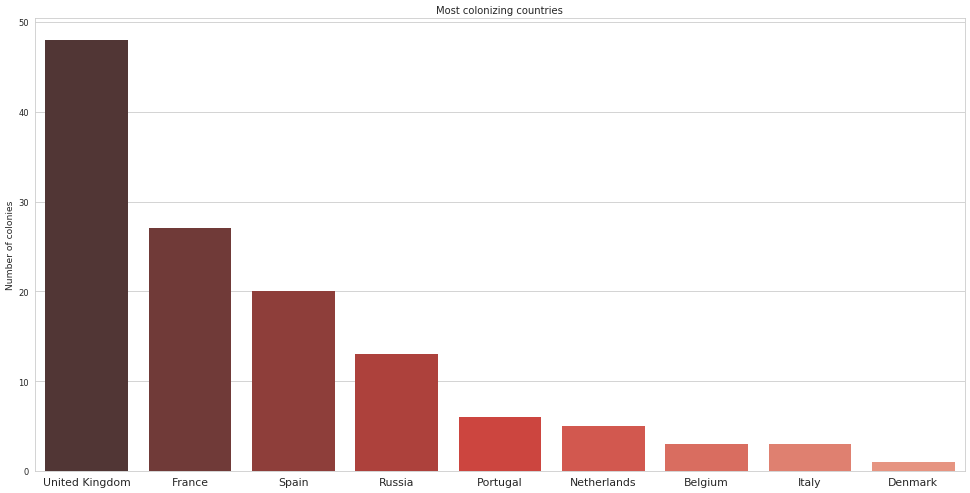

In [4]:
x = np.linspace(0,8,9)
my_xticks = colonies_df['Colonizer Country'].value_counts().index
y = colonies_df['Colonizer Country'].value_counts().values

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks, fontsize = 13)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

### Map of Colonisation

Considering the results found above on the most colonising countries, we take the 9 first colonizers and plot them below. (United Kingdom, France, Russia, Portugal, Spain, Netherlands, Belgium, Italy and Denmark)

In [5]:
def colonisers_colors(country_id):
    """Maps each colonizing country with a different color"""
    
    if not country_id:
        return '#808080'
    
    if colonies_df['ID'].str.contains(country_id).sum()>0:
        country = colonies_df.loc[colonies_df['ID'] == country_id, 'Colonizer Country'].values[0]
    else:
        country = 'NaN'
        
    if country == 'France':
        return '#3399ff' # Dark Blue
    if (country == 'United Kingdom') or (country == 'Britain'):
        return '#ff0000' # Red
    if country == 'Russia':
        return '#ffffff' # Blue
    if country == 'Portugal':
        return '#66ff66' # Light Green
    if country == 'Spain':
        return '#ffff66' # Yellow     
    if country == 'Netherlands':
        return '#ff9900' # Orange       
    if country == 'Belgium':
        return '#ff33cc' # Pink     
    if country == 'Denmark':
        return '#800000' # Dark Green
    if country == 'Italy':
        return '#339966' # Dark Green
    if country == 'None':
        return '#808080'
    else:
        return '#808080'

In [6]:
# Initialisation of Json and dataset
colonies_df = colonisation_df
world_edge = os.path.join('maps', 'world.json')

# Creation of colony_map
colony_map = folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
folium.GeoJson(
    world_edge,
    name='geojson'
).add_to(colony_map)

NameError: name 'colonisation_df' is not defined

In [ ]:
# Adding color filters to the map
folium.GeoJson(
    world_edge,
    style_function=lambda feature: {
        'fillColor': colonisers_colors(feature['properties']['iso_a2']),
        'color' : 'black',
        'weight' : 1,
        'fill_opacity' : 1,
        'line_opacity':1,
        'opacity': 0.5
        }
    ).add_to(colony_map)

colony_map

In [ ]:
print ("_____Legend____")
print ("Red - United Kingdom / Blue - France / Yellow - Spain / Orange - Portugal / White - Russia / Dark Green - Italy /    Light Green - Portugal / Brown - Denmark")

All continents were touched by the European colonizers. Some countries like the United States and China are classified as French colonies, where in reality France only possessed partial places of the country, along with other colonizers.

## Decolonization Movement


By looking at the deconolisation dates, we can observe when European Colonisers has lost their grasps on their colonies. (Happening by vague in continents? Communicating between continents? Map of the decolonisation date would be good to look at limitrophs countries)

In [ ]:
decolonisation_df = colonisation_df
new_df = decolonisation_df.dropna()
new_df = new_df[new_df['Year'] != '1991b']

In [ ]:
df1 = new_df['Year']
df1=df1.astype(float)

plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
y = df1.value_counts()
y = y.sort_index()
plt.bar(y.index.values, y.values,width=1,color = 'red')
plt.xlabel('Year')
plt.xticks(fontsize = 13, rotation='vertical')
plt.ylabel('Number of independance declared')
plt.grid(False)
plt.title('Evolution of the independance movement', fontsize = 13)
plt.show()

The independance movement of former colonies began before the XIXth century. The observe that there was a first wave after 1800, then a few over time. Until after the IInd World War, where the movement expanded. It might come from the treatment and misunderstanding of the colonies in a war where they weren't concerned by the belligerants motivations. 

To push further our analysis, we want to observe if those independance were also geographically correlated.

In [ ]:
def independance_colors(country_id):
    """Maps each colonizing country with a different color"""
    
    if colonies_df['ID'].str.contains(country_id).sum()>0:
        date = decolonisation_df.loc[decolonisation_df['ID'] == country_id, 'Year'].values[0]
    else:
        date = 'NaN'
    
    if str(date) == 'NaN' or str(date) == 'nan':
        return '#808080'
    
    if str(date) == '1991b':
        date = 1991
    
    date = int(date)
    if date < 1850:
        return '#f7fed9'
    elif date < 1930:
        return '#f5eb00'
    elif date < 1955:
        return '#ffa900'
    elif date < 1980:
        return '#ff4013'
    else:
        return '#a10006'

In [ ]:
step = cm.StepColormap(
    ['#f7fed9', '#f5eb00', '#ffa900','#ff4013','#a10006'],
    vmin=1810, vmax=2010,
    index=[1810,1850, 1930, 1955, 1980,2010],
    caption='Independance Date'
)

In [ ]:
# Initialisation of Json and dataset
colonies_df = colonisation_df
world_edge = os.path.join('maps', 'world.json')

# Creation of colony_map
independance_map = folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
folium.GeoJson(
    world_edge,
    name='geojson'
).add_to(independance_map)

# Adding color filters to the map
folium.GeoJson(
    world_edge,
    style_function=lambda feature: {
        'color' : 'black',
        'fillColor': independance_colors(feature['properties']['iso_a2']),
        'weight' : 1,
        'opacity': 0.5,
        'fill_opacity': 1,
        'line_opacity': 1
        }
    ).add_to(independance_map)
step.caption = 'Independance Date'
independance_map.add_child(step)

independance_map

With this map, it becomes evident that the decolonization movement was also initiated by geographic proximity. The first wave we observed is located in the Americas and began around the 1800s. 

Africa seemed to have been decolonized through waves. It can be explained as the division of countries nowadays doesn't necessarily represent the past colonies, which were way bigger in size. The colonizers often divided them during the decolonization, bringing some regional conflicts that we still hear about today (India and Pakistan for example).

## History of conflicts in Modern History

### Presence of conflicts on continents

In this part, all conflicts are taken into account, given that they present more than 25 casualties.
Maybe separating this table also between minor and major conflicts would be relevant.

In [ ]:
ucdp_df = clean_conflict
ucdp_df.head()

In [ ]:
x = np.linspace(1,5,5)
y_ = ucdp_df['region'].value_counts().values
y = y_[:5]
myticks = ['Asia','Africa','Middle East','Americas','Europe']

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.ylabel('Number of conflicts')
plt.title('Number of conflicts per Regions')
plt.xticks(x-1,myticks)
plt.show()

Since 1945, most of the international conflicts happened either in Asia or Africa, the main continents of the decolonisations of the XXth century. 

### What are they fighting for?


In [ ]:
cleaned_df = ucdp_df.loc[~ucdp_df['region'].isin(['1, 3', '1, 2', '1, 4', '1, 5', '1, 3, 5', '1, 2, 3, 5'])]
myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = cleaned_df.groupby(['region', 'incomp'])['region'].count().unstack('incomp').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2[[1,2,3]].plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13)
plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Territories', 'Governments', 'Territories & Governements'],fontsize = 11)
plt.title('Origin of conflicts per continents', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

As we explained above, the decolonisation process often excluded the history of the previous state entities. They ignored the territorial claims and tribes divisions to draw lines on maps (mainly in Africa). Thus, we observe that in both 'colonized' continents, most of the conflicts emerge from territorial claims. Then, the instability of the local states and governments is highlited by the high level of governemental conflicts, with new groups trying to reach powers in former colonies.

### Evolution of conflicts

To better understands the history of conflicts throughout the world, we plot the number of conflicts over time from 1946 to 2016 on all continents. 

In [ ]:
cleaned_df = ucdp_df.loc[~ucdp_df['region'].isin(['1, 3', '1, 2', '1, 4', '1, 5', '1, 3, 5', '1, 2, 3, 5'])]

myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = cleaned_df.groupby(['year', 'region'])['year'].count().unstack('region').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2.plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13, width = 1)
#plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Europe','Middle East','Asia','Africa','Americas'],fontsize = 11)
plt.title('Number of conflicts per year and per continent', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

By beginning our observations by the 'old-continent', Europe, we observe that the number of conflicts is declining after the end of the IInd World War, to stagnate to almost no-conflicts for a long period. The Yugoslav war that begun in 1991 stop this period of peace that we continue to live with the conflicts in Eastern Europe with Russia.

The most important observation is that the conflicts seemed almost non-existant in Africa after the World War and began to took importance on the continent starting in 1952. This date also corresponds to the independance of Lybia, the first country to achieve independence through the United Nations and one of the first former European possessions in Africa to gain independence. 

### Closer look at colonized continents

With the graph above, we observe some simple tendancies that needs to be refined for each colonized continents. One can observe below the evolution of conflicts for each continents. Africa saw its conflict grow after the seconf world war to remain instable up to this day. In comparison, Asia presents an almost constant number of conflicts over time.
Middle East in another hand is alterning between low conflicts period and higher ones. We observe a rise in the conflicts in the 1970s during the wars with Israel.

In [ ]:
def evolution_conflict(df, string_):
    plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
    y = df['year'].value_counts()
    y = y.sort_index()
    sns.barplot(y.index, y.values,palette="Reds_d")
    plt.xlabel('Year')
    plt.xticks(fontsize = 13,rotation='vertical')
    plt.ylabel('Number of conflicts')
    plt.title('Evolution of conflicts in %s' %(string_))
    plt.show()

In [ ]:
africa_df = cleaned_df[cleaned_df['region'] == '4']
evolution_conflict(africa_df, 'Africa')

As stated before, the conflicts in Africa seems to have emerged after the IInd World War. Nonetheless, they grew in size to reach a certain threshold around 1976, where it remained since then.

In [ ]:
asia_df = cleaned_df[cleaned_df['region'] == '3']
evolution_conflict(asia_df, 'Asia')

It seems that conflicts also increased in Asia and remained almost constant since 1976.

In [ ]:
middle_df = cleaned_df[cleaned_df['region'] == '2']
evolution_conflict(middle_df, 'Middle East')

Conflicts in the Middle East are marked by waves of war and peace. The Six-Day War with Israel against other Arab countries can be observed in 1967. The Soviet-Afghan war can be observed in 1979, all the way to 1989. And now an escalation of tensions since the beginning of the war on Terrorism in 2001 and the instability it brought on the region.

## Relevant countries examples

Our project will focus on a world map of the decolonization and the conflicts that emerged in countries after that. In order to observe if this is possible, we will perform a short analysis on chosen countries. We will study two main cases, countries where the decolonization was violent (Algeria, Congo...) and the ones where it was mostly peacefull (Syria, India ...).

In [ ]:
cleaned_df = clean_conflict

def country_analysis(country_string):
    # Plot number of conflicts over time / Add history related remarks? (Like a line at the independence)
    current_df = cleaned_df[cleaned_df['location'].isin([country_string])]
   
    plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
    y = current_df['year'].value_counts()
    y = y.sort_index()
    plt.plot(y.index, y.values)
    plt.xlabel('Year')
    plt.xticks(fontsize = 13, rotation='vertical')
    plt.ylabel('Number of conflicts')
    plt.title('Evolution of conflicts in %s' %(country_string))
    plt.show()
       
    # Plot independance date on the graph
    #if ~(decolonisation_df[decolonisation_df['Colonized Country'] == country_string].values[0].empty):
    #    inde_date = decolonisation_df.loc[decolonisation_df['Colonized Country'] == country_string, 'Year'].values[0]
    #    plt.axvline(inde_date, color = 'red')

### Violently decolonized country - Algeria, Congo, Vietnam, Haiti?

In [ ]:
country_string = 'Algeria'
#decolonisation_df[decolonisation_df['Colonized Country'] == country_string]
current_df = cleaned_df[cleaned_df['location'] == country_string]
country_analysis(country_string)

In [ ]:
country_string = 'Vietnam'
#decolonisation_df[decolonisation_df['Colonized Country'] == country_string]
current_df = cleaned_df[cleaned_df['location'] == country_string]
country_analysis(country_string)

### Peacefully decolonized country - India, Lebanon, Philippines?

In [ ]:
country_string = 'India'
country_analysis(country_string)

In [ ]:
country_string = 'Philippines'
country_analysis(country_string)

### Observation

It seems that we lack informations to correctly identify the situations in the different former colonies. For example, Vietnam is known for the different conflicts that happened on its territory since its independance. 
For the next Milestone, we will have to push our analysis by using another UCDP dataset with more geolocalized conflicts to better assess the stability of the former colonies.